In [1]:
from pyMeasure import *

Importing pyMeasure, this should take roughly 30 seconds
The module smithplot was not found,please put it on the python path
The module smithplot was not found,please put it on the python path


In [2]:
class VNA(VisaInstrument):
    """Control class for a linear VNA.
    The .measure_sparameters ans .measure_switch_terms return a S2PV1
    class that can be saved, printed or have a simple plot using show(). The attribute frequency_list
    stores the frequency points as Hz."""

    def __init__(self, resource_name=None, **options):
        """Initializes the E8631A control class"""
        defaults = {"state_directory": os.getcwd(), "frequency_units": "Hz"}
        self.options = {}
        for key, value in defaults.iteritems():
            self.options[key] = value
        for key, value in options.iteritems():
            self.options[key] = value
        VisaInstrument.__init__(self, resource_name, **self.options)
        self.power = self.get_power()
        self.IFBW = self.get_IFBW()
        self.frequency_units = self.options["frequency_units"]
        self.frequency_table = []
        # this should be if SENS:SWE:TYPE? is LIN or LOG
        self.sweep_type = self.get_sweep_type()
        if re.search("LIN", self.sweep_type, re.IGNORECASE):
            start = float(self.query("SENS:FREQ:START?").replace("\n", ""))
            stop = float(self.query("SENS:FREQ:STOP?").replace("\n", ""))
            number_points = int(self.query("SENS:SWE:POIN?").replace("\n", ""))
            self.frequency_list = np.linspace(start, stop, number_points).tolist()
        elif re.search("LIN", self.sweep_type, re.IGNORECASE):
            start = float(self.query("SENS:FREQ:START?").replace("\n", ""))
            stop = float(self.query("SENS:FREQ:STOP?").replace("\n", ""))
            number_points = int(self.query("SENS:SWE:POIN?").replace("\n", ""))
            logspace_start = np.log10(start)
            logspace_stop = np.log10(stop)
            self.frequency_list = map(lambda x: round(x, ndigits=3), np.logspace(logspace_start, logspace_stop,
                                                                                 num=number_points, base=10).tolist())
        elif re.search("SEG", self.sweep_type, re.IGNORECASE):
            number_segments = int(self.query("SENS:SEGM:COUN?").replace("\n", ""))
            for i in range(number_segments):
                start = float(self.query("SENS:SEGM{0}:FREQ:START?".format(i + 1)).replace("\n", ""))
                stop = float(self.query("SENS:SEGM{0}:FREQ:STOP?".format(i + 1)).replace("\n", ""))
                number_points = int(self.query("SENS:SEGM{0}:SWE:POIN?".format(i + 1)).replace("\n", ""))
                step = (stop - start) / float(number_points - 1)
                self.frequency_table.append({"start": start, "stop": stop,
                                             "number_points": number_points, "step": step})
                self.frequency_table = fix_segment_table(self.frequency_table)
                frequency_list = []
                for row in self.frequency_table[:]:
                    new_list = np.linspace(row["start"], row["stop"], row["number_points"]).tolist()
                    frequency_list = frequency_list + new_list
                self.frequency_list = frequency_list
        else:
            self.frequency_list = []

    def initialize(self,**options):
        """Intializes the system"""
        defaults = {"reset":True}
        initialize_options = {}
        for key, value in defaults.iteritems():
            initialize_options[key] = value
        for key, value in options:
            initialize_options[key] = value
        if initialize_options["reset"]:
            self.write("SYST:FPRESET")
        self.write("DISPlay:WINDow1:STATE ON")
        self.write("CALCulate:PARameter:DEFine 'S11',S11")
        self.write("DISPlay:WINDow1:TRACe1:FEED 'S11'")
        self.write("CALCulate:PARameter:DEFine 'S12',S12")
        self.write("DISPlay:WINDow1:TRACe2:FEED 'S12'")
        self.write("CALCulate:PARameter:DEFine 'S21',S21")
        self.write("DISPlay:WINDow1:TRACe3:FEED 'S21'")
        self.write("CALCulate:PARameter:DEFine 'S22',S22")
        self.write("DISPlay:WINDow1:TRACe4:FEED 'S22'")
        self.sweep_type = self.get_sweep_type()
        if re.search("LIN", self.sweep_type, re.IGNORECASE):
            start = float(self.query("SENS:FREQ:START?").replace("\n", ""))
            stop = float(self.query("SENS:FREQ:STOP?").replace("\n", ""))
            number_points = int(self.query("SENS:SWE:POIN?").replace("\n", ""))
            self.frequency_list = np.linspace(start, stop, number_points).tolist()
        elif re.search("LIN", self.sweep_type, re.IGNORECASE):
            start = float(self.query("SENS:FREQ:START?").replace("\n", ""))
            stop = float(self.query("SENS:FREQ:STOP?").replace("\n", ""))
            number_points = int(self.query("SENS:SWE:POIN?").replace("\n", ""))
            logspace_start = np.log10(start)
            logspace_stop = np.log10(stop)
            self.frequency_list = map(lambda x: round(x, ndigits=3), np.logspace(logspace_start, logspace_stop,
                                                                                 num=number_points, base=10).tolist())
        elif re.search("SEG", self.sweep_type, re.IGNORECASE):
            number_segments = int(self.query("SENS:SEGM:COUN?").replace("\n", ""))
            for i in range(number_segments):
                start = float(self.query("SENS:SEGM{0}:FREQ:START?".format(i + 1)).replace("\n", ""))
                stop = float(self.query("SENS:SEGM{0}:FREQ:STOP?".format(i + 1)).replace("\n", ""))
                number_points = int(self.query("SENS:SEGM{0}:SWE:POIN?".format(i + 1)).replace("\n", ""))
                step = (stop - start) / float(number_points - 1)
                self.frequency_table.append({"start": start, "stop": stop,
                                             "number_points": number_points, "step": step})
                self.frequency_table = fix_segment_table(self.frequency_table)
                frequency_list = []
                for row in self.frequency_table[:]:
                    new_list = np.linspace(row["start"], row["stop"], row["number_points"]).tolist()
                    frequency_list = frequency_list + new_list
                self.frequency_list = frequency_list
        else:
            self.frequency_list = []

    def set_power(self, power):
        """Sets the power of the Instrument in dbm"""
        self.write('SOUR:POW {0}'.format(power))

    def get_power(self):
        "Returns the power of the instrument in dbm"
        return self.query('SOUR:POW?')

    def get_sweep_type(self):
        "Returns the current sweep type. It can be LIN, LOG, or SEG"
        return self.query("SENS:SWE:TYPE?")

    def set_IFBW(self, ifbw):
        """Sets the IF Bandwidth of the instrument in Hz"""
        self.write('SENS:BAND {0}'.format(ifbw))
        self.IFBW = ifbw

    def get_IFBW(self):
        """Returns the IFBW of the instrument in Hz"""
        ifbw = float(self.query('SENS:BAND?'))
        self.IFBW = ifbw
        return ifbw

    def set_frequency_units(self, frequency_units="Hz"):
        """Sets the frequency units of the class, all values are still written to the VNA
        as Hz and the attrbiute frequncy_list is in Hz,
        however all commands that deal with sweeps and measurements will be in units"""
        for unit in VNA_FREQUENCY_UNIT_MULTIPLIERS.keys():
            if re.match(unit, frequency_units, re.IGNORECASE):
                self.frequency_units = unit

    def add_segment(self, start, stop=None, number_points=None, step=None, frequency_units="Hz"):
        """Sets the VNA to a segment mode and appends a single entry in the frequency table. If start is the only specified
        parameter sets the entry to start=stop and number_points = 1. If step is specified calculates the number of points
        and sets start, stop, number_points on the VNA. It also stores the value into the attribute frequency_list.
        Note this function was primarily tested on an agilent which stores frequency to the nearest mHz.
        """
        # first handle the start only case
        if stop is None and number_points is None:
            stop = start
            number_points = 1
        # fix the frequency units
        for unit in VNA_FREQUENCY_UNIT_MULTIPLIERS.keys():
            if re.match(unit, frequency_units, re.IGNORECASE):
                start = start * VNA_FREQUENCY_UNIT_MULTIPLIERS[unit]
                stop = stop * VNA_FREQUENCY_UNIT_MULTIPLIERS[unit]
                if step:
                    step = step * VNA_FREQUENCY_UNIT_MULTIPLIERS[unit]
                self.frequency_units = unit
        # handle creating step and number of points
        if number_points is None and not step is None:
            number_points = round((stop - start) / step) + 1
        elif number_points is None:
            number_points = 201  # I don't like the default for n_points this far down in the code
            step = (stop - start) / (number_points - 1)
        else:
            step = (stop - start) / (number_points - 1)

        # append the new segment to self.frequency_table and fix any strangeness
        self.frequency_table.append({"start": start, "stop": stop, "number_points": number_points, "step": step})
        self.frequency_table = fix_segment_table(self.frequency_table[:])

        # update the frequency_list
        frequency_list = []
        for row in self.frequency_table[:]:
            new_list = np.linspace(row["start"], row["stop"], row["number_points"]).tolist()
            frequency_list = frequency_list + new_list
        self.frequency_list = frequency_list

        # now we write the segment to the instrument
        if not re.search("SEG", self.get_sweep_type(), re.IGNORECASE):
            self.write('SENS:SWE:TYPE SEGM')

        # now get the number of segments and add or delete the right amount to make it line up with self.frequency_table
        # This routine is broken

        number_segments = int(self.query("SENS:SEGM:COUN?").replace("\n", ""))
        print("{0} is {1}".format("number_segments", number_segments))
        if len(self.frequency_table) < number_segments:
            difference = number_segments - len(self.frequency_table)
            max_segment = number_segments
            while (difference != 0):
                self.write("SENS:SEGM{0}:DEL".format(max_segment))
                max_segment -= 1
                difference -= 1
        elif len(self.frequency_table) > number_segments:
            difference = len(self.frequency_table) - number_segments
            max_segment = number_segments + 1
            print("{0} is {1}".format("difference", difference))
            while (difference != 0):
                self.write("SENS:SEGM{0}:ADD".format(max_segment))
                max_segment += 1
                difference -= 1
                print("{0} is {1}".format("difference", difference))
        else:
            pass

        for row_index, row in enumerate(self.frequency_table[:]):
            [start, stop, number_points] = [row["start"], row["stop"], row["number_points"]]
            # SENSe<cnum>:SEGMent<snum>:SWEep:POINts <num>
            self.write("SENS:SEGM{0}:FREQ:START {1}".format(row_index + 1, start))
            self.write("SENS:SEGM{0}:FREQ:STOP {1}".format(row_index + 1, stop))
            self.write("SENS:SEGM{0}:SWE:POIN {1}".format(row_index + 1, number_points))
            self.write("SENS:SEGM{0}:STAT ON".format(row_index + 1))

    def write_frequency_table(self, frequency_table=None):
        """Writes frequency_table to the instrument, the frequency table should be in the form
        [{start:,stop:,number_points:}..] or None"""
        if frequency_table is None:
            frequency_table = self.frequency_table[:]
        for row_index, row in enumerate(frequency_table[:]):
            [start, stop, number_points] = [row["start"], row["stop"], row["number_points"]]
            # SENSe<cnum>:SEGMent<snum>:SWEep:POINts <num>
            self.write("SENS:SEGM{0}:FREQ:START {1}".format(row_index + 1, start))
            self.write("SENS:SEGM{0}:FREQ:STOP {1}".format(row_index + 1, stop))
            self.write("SENS:SEGM{0}:SWE:POIN {1}".format(row_index + 1, number_points))
            self.write("SENS:SEGM{0}:STAT ON".format(row_index + 1))

    def set_frequency(self, start, stop=None, number_points=None, step=None, type='LIN', frequency_units="Hz"):
        """Sets the VNA to a linear mode and creates a single entry in the frequency table. If start is the only specified
        parameter sets the entry to start=stop and number_points = 1. If step is specified calculates the number of points
        and sets start, stop, number_points on the VNA. It also stores the value into the attribute frequency_list.
        Note this function was primarily tested on an agilent which stores frequency to the nearest mHz.
        """

        if stop is None and number_points is None:
            stop = start
            number_points = 1

        for unit in VNA_FREQUENCY_UNIT_MULTIPLIERS.keys():
            if re.match(unit, frequency_units, re.IGNORECASE):
                start = start * VNA_FREQUENCY_UNIT_MULTIPLIERS[unit]
                stop = stop * VNA_FREQUENCY_UNIT_MULTIPLIERS[unit]
                if step:
                    step = step * VNA_FREQUENCY_UNIT_MULTIPLIERS[unit]
                self.frequency_units = unit
        if number_points is None and not step is None:
            number_points = round((stop - start) / step) + 1

        if re.search("LIN", type, re.IGNORECASE):
            self.write('SENS:SWE:TYPE LIN')
            self.frequency_list = np.linspace(start, stop, number_points).tolist()
        elif re.search("LOG", type, re.IGNORECASE):
            self.write('SENS:SWE:TYPE LOG')
            logspace_start = np.log10(start)
            logspace_stop = np.log10(stop)
            self.frequency_list = map(lambda x: round(x, ndigits=3), np.logspace(logspace_start, logspace_stop,
                                                                                 num=number_points, base=10).tolist())
        else:
            self.write('SENS:SWE:TYPE LIN')
            self.frequency_list = map(lambda x: round(x, ndigits=3),
                                      np.linspace(start, stop, number_points).tolist())
        self.write("SENS:FREQ:START {0}".format(start))
        self.write("SENS:FREQ:STOP {0}".format(stop))
        self.write("SENS:SWE:POIN {0}".format(number_points))

    def get_frequency(self):
        "Returns the frequency in python list format"
        return self.frequency_list

    def is_busy(self):
        """Checks if the instrument is currently doing something and returns a boolean value"""
        opc = bool(self.resource.query("*OPC?"))
        return not opc

    def measure_switch_terms(self, **options):
        """Measures switch terms and returns a s2p table in foward and reverse format"""
        defaults = {"view_trace":True}
        self.measure_switch_term_options = {}
        for key, value in defaults.iteritems():
            self.measure_switch_term_options[key] = value
        for key, value in options:
            self.measure_switch_term_options[key] = value
        # this resets the traces to be based on swith terms
        # Set VS to be remotely triggered by GPIB
        self.write("SENS:HOLD:FUNC HOLD")
        self.write("TRIG:REM:TYP CHAN")
        # Set the Channel to have 2 Traces
        self.write("CALC1:PAR:COUN 2")
        # Trace 1 This is port 2 or Forward Switch Terms
        self.write("CALC1:PAR:DEF 'FWD',R2,1") # note this command is different for vector star A2,B2
        if self.measure_switch_term_options["view_trace"]:
            self.write("DISPlay:WINDow1:TRACe5:FEED 'FWD'")
        # Trace 2 This is port 1 or Reverse Switch Terms
        self.write("CALC1:PAR:DEF 'REV',R1,2")
        if self.measure_switch_term_options["view_trace"]:
            self.write("DISPlay:WINDow1:TRACe6:FEED 'REV'")

        # Select Channel
        self.write("CALC1:SEL;")
        self.write("ABORT;TRIG:SING;")
        # Sleep for the duration of the scan
        time.sleep(len(self.frequency_list) * 2 / float(self.IFBW))
        # wait for other functions to be completed
        while self.is_busy():
            time.sleep(.01)
        # Set the read format
        self.write("FORM:DATA ASC")
        # Read in the data
        self.write("CALC:PAR:SEL FWD;")
        foward_switch_string = self.query("CALC:DATA? SDATA")
        while self.is_busy():
            time.sleep(.01)
        self.write("CALC:PAR:SEL REV;")
        reverse_switch_string = self.query("CALC:DATA? SDATA")
        # Now parse the string
        foward_switch_list = foward_switch_string.replace("\n", "").split(",")
        reverse_switch_list = reverse_switch_string.replace("\n", "").split(",")
        real_foward = foward_switch_list[0::2]
        imaginary_forward = foward_switch_list[1::2]
        real_reverse = reverse_switch_list[0::2]
        imaginary_reverse = reverse_switch_list[1::2]
        switch_data = []
        for index, frequency in enumerate(self.frequency_list[:]):
            new_row = [frequency,
                       real_foward[index], imaginary_forward[index],
                       real_reverse[index], imaginary_reverse[index],
                       0, 0,
                       0, 0]
            new_row = map(lambda x: float(x), new_row)
            switch_data.append(new_row)
        option_line = "# Hz S RI R 50"
        # add some options here about auto saving
        # do we want comment options?
        s2p = S2PV1(None, option_line=option_line, data=switch_data)
        s2p.change_frequency_units(self.frequency_units)
        return s2p

    def measure_sparameters(self, **options):
        """Triggers a single sparameter measurement for all 4 parameters and returns a SP2V1 object"""
        defaults = {"trigger": "single"}
        self.measure_sparameter_options = {}
        for key, value in defaults.iteritems():
            self.measure_sparameter_options[key] = value
        for key, value in options:
            self.measure_sparameter_options[key] = value
        if self.measure_sparameter_options["trigger"] in ["single"]:
            self.write("INITiate:CONTinuous OFF")
            self.write("ABORT;INITiate:IMMediate;*wai")
            # now go to sleep for the time to take the scan
            time.sleep(len(self.frequency_list) * 2 / float(self.IFBW))

        # wait for other functions to be completed
        while self.is_busy():
            time.sleep(.01)
        # Set the format to ascii and set up sweep definitions
        self.write('FORM:ASCII')
        # First get the Sparameter lists
        self.write('CALC:PAR:SEL S11')
        self.write('CALC:FORM MLIN')
        while self.is_busy():
            time.sleep(.01)
        s11_string = self.query('CALC:DATA? SDATA')

        self.write('CALC:PAR:SEL S12')
        self.write('CALC:FORM MLIN')
        while self.is_busy():
            time.sleep(.01)
        s12_string = self.query('CALC:DATA? SDATA')
        self.write('CALC:PAR:SEL S21')
        self.write('CALC:FORM MLIN')
        while self.is_busy():
            time.sleep(.01)
        s21_string = self.query('CALC:DATA? SDATA')
        self.write('CALC:PAR:SEL S22')
        self.write('CALC:FORM MLIN')
        while self.is_busy():
            time.sleep(.01)
        s22_string = self.query('CALC:DATA? SDATA')
        # String Parsing
        s11_list = s11_string.replace("\n", "").split(",")
        s12_list = s12_string.replace("\n", "").split(",")
        s21_list = s21_string.replace("\n", "").split(",")
        s22_list = s22_string.replace("\n", "").split(",")
        # Construct a list of lists that is data in RI format
        reS11 = s11_list[0::2]
        imS11 = s11_list[1::2]
        reS12 = s12_list[0::2]
        imS12 = s12_list[1::2]
        reS21 = s21_list[0::2]
        imS21 = s21_list[1::2]
        reS22 = s22_list[0::2]
        imS22 = s22_list[1::2]
        sparameter_data = []
        for index, frequency in enumerate(self.frequency_list[:]):
            new_row = [frequency,
                       reS11[index], imS11[index],
                       reS21[index], imS21[index],
                       reS12[index], imS12[index],
                       reS22[index], imS22[index]]
            new_row = map(lambda x: float(x), new_row)
            sparameter_data.append(new_row)
        option_line = "# Hz S RI R 50"
        # add some options here about auto saving
        # do we want comment options?
        s2p = S2PV1(None, option_line=option_line, data=sparameter_data)
        s2p.change_frequency_units(self.frequency_units)
        return s2p

In [2]:
new_vna=VNA("GPIB::17")

The information sheet was not found defaulting to address


In [3]:
new_vna.initialize()

In [4]:
new_vna.get_IFBW()

35000.0

In [5]:
new_vna.set_frequency(start=10**8,stop=40*10**9,number_points=1601,type='LOG')

In [6]:
s2p=new_vna.measure_sparameters()

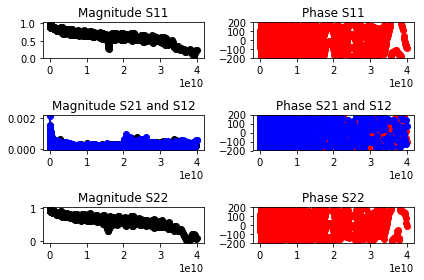

In [7]:
s2p.show();

In [12]:
new_vna.write("CALC:FORM MLOG")

(16L, <StatusCode.success: 0>)

In [9]:
new_vna.get_power()

u'-1.00000000000E+001\n'

In [8]:
new_vna.set_power(-10)

In [10]:
new_vna.set_IFBW(100)
powers=[-20,-10,-5,0]
data_array=[]
for power in powers:
    new_vna.set_power(power)
    data_array.append(new_vna.measure_sparameters())

<IPython.core.display.Javascript object>


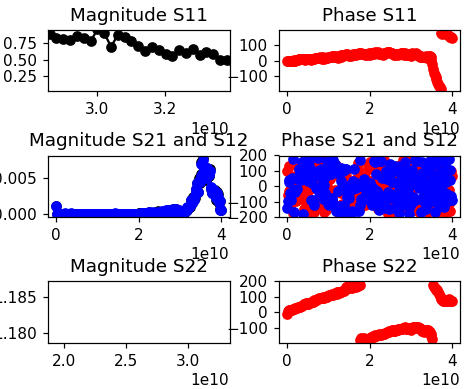

In [24]:
%matplotlib notebook
data_array[2].show();

In [8]:
new_vna.set_IFBW(100)

In [9]:
switch=new_vna.measure_switch_terms()

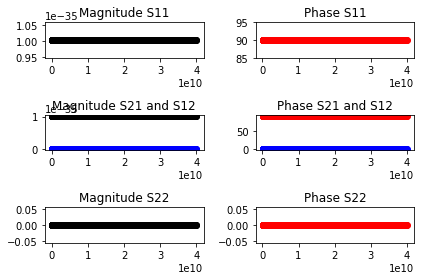

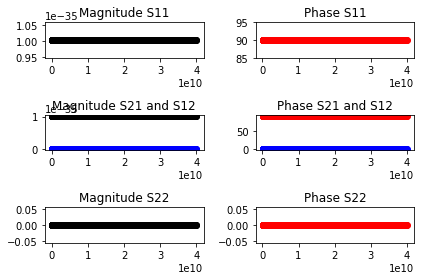

In [10]:
switch.show()

In [16]:
dir(new_vna)

['DEFAULT_STATE_QUERY_DICTIONARY',
 'IFBW',
 'STATE_BUFFER_MAX_LENGTH',
 '__doc__',
 '__init__',
 '__module__',
 '__str__',
 'addEntry',
 'addSegment',
 'add_entry',
 'add_segment',
 'ask',
 'close',
 'current_state',
 'description',
 'frequency_list',
 'frequency_table',
 'frequency_units',
 'getFrequency',
 'getIfbw',
 'getImagePath',
 'getPower',
 'getQueryDictionary',
 'getState',
 'getSweepType',
 'get_IFBW',
 'get_frequency',
 'get_image_path',
 'get_power',
 'get_query_dictionary',
 'get_state',
 'get_sweep_type',
 'info_found',
 'info_path',
 'initialize',
 'instrument_address',
 'isBusy',
 'is_busy',
 'loadState',
 'load_state',
 'measureSparameters',
 'measureSwitchTerms',
 'measure_sparameter_options',
 'measure_sparameters',
 'measure_switch_term_options',
 'measure_switch_terms',
 'name',
 'options',
 'power',
 'query',
 'read',
 'resource',
 'resource_manager',
 'save',
 'saveCurrentState',
 'saveHtml',
 'saveState',
 'save_HTML',
 'save_current_state',
 'save_state',
 's

In [17]:
print new_vna.IFBW

35000.0


In [20]:
new_vna.instrument_address

'GPIB::17'

In [22]:
new_vna.get_frequency()

[10000000.0,
 209950000.0,
 409900000.0,
 609850000.0,
 809800000.0,
 1009750000.0,
 1209700000.0,
 1409650000.0,
 1609600000.0,
 1809550000.0,
 2009500000.0,
 2209450000.0,
 2409400000.0,
 2609350000.0,
 2809300000.0,
 3009250000.0,
 3209200000.0,
 3409150000.0,
 3609100000.0,
 3809050000.0,
 4009000000.0,
 4208950000.0,
 4408900000.0,
 4608850000.0,
 4808800000.0,
 5008750000.0,
 5208700000.0,
 5408650000.0,
 5608600000.0,
 5808550000.0,
 6008500000.0,
 6208450000.0,
 6408400000.0,
 6608350000.0,
 6808300000.0,
 7008250000.0,
 7208200000.0,
 7408150000.0,
 7608100000.0,
 7808050000.0,
 8008000000.0,
 8207950000.0,
 8407900000.0,
 8607850000.0,
 8807800000.0,
 9007750000.0,
 9207700000.0,
 9407650000.0,
 9607600000.0,
 9807550000.0,
 10007500000.0,
 10207450000.0,
 10407400000.0,
 10607350000.0,
 10807300000.0,
 11007250000.0,
 11207200000.0,
 11407150000.0,
 11607100000.0,
 11807050000.0,
 12007000000.0,
 12206950000.0,
 12406900000.0,
 12606850000.0,
 12806800000.0,
 13006750000.0,


In [27]:
new_vna.close()

In [51]:
print switch


# Hz S RI R 50
1e+07  1.403e-38  1.003e-35  1.403e-38  1.003e-35  0  0  0  0
2.1e+08  1.403e-38  1.003e-35  1.403e-38  1.003e-35  0  0  0  0
4.099e+08  1.403e-38  1.003e-35  1.403e-38  1.003e-35  0  0  0  0
6.098e+08  1.403e-38  1.003e-35  1.403e-38  1.003e-35  0  0  0  0
8.098e+08  1.403e-38  1.003e-35  1.403e-38  1.003e-35  0  0  0  0
1.01e+09  1.403e-38  1.003e-35  1.403e-38  1.003e-35  0  0  0  0
1.21e+09  1.403e-38  1.003e-35  1.403e-38  1.003e-35  0  0  0  0
1.41e+09  1.403e-38  1.003e-35  1.403e-38  1.003e-35  0  0  0  0
1.61e+09  1.403e-38  1.003e-35  1.403e-38  1.003e-35  0  0  0  0
1.81e+09  1.403e-38  1.003e-35  1.403e-38  1.003e-35  0  0  0  0
2.01e+09  1.403e-38  1.003e-35  1.403e-38  1.003e-35  0  0  0  0
2.209e+09  1.403e-38  1.003e-35  1.403e-38  1.003e-35  0  0  0  0
2.409e+09  1.403e-38  1.003e-35  1.403e-38  1.003e-35  0  0  0  0
2.609e+09  1.403e-38  1.003e-35  1.403e-38  1.003e-35  0  0  0  0
2.809e+09  1.403e-38  1.003e-35  1.403e-38  1.003e-35  0  0  0  0
3.009e+

In [11]:
import visa

In [12]:
visa.

<module 'pyvisa.constants' from 'C:\ProgramData\Anaconda2\lib\site-packages\pyvisa\constants.pyc'>